This notebook contains all analysises that i came up with

In [12]:
# imports
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data
with open("data/second_day_g30.pkl", "rb") as f:
    data = pickle.load(f)
with open("data/second_day_g30_transposed.pkl", "rb") as f:
    data_transposed = pickle.load(f)
with open("data/second_day_keys.pkl", "rb") as f:
    keys = pickle.load(f)

First calculate all the flow rates in people per minute

In [8]:
time_window = 30

flow_rates = []
for tf in data_transposed:
    flow = {}
    for spot in keys:
        flow[spot] = (len(tf[spot]) / time_window) * 60 # people per minute
    flow_rates.append(flow)

calculate average and max flow per spot

In [11]:
print("Flow rates in people per minute")
print()
for spot in keys:
    mean = 0
    max = 0
    for tf in flow_rates:
        mean += tf[spot]
        if tf[spot] > max:
            max = tf[spot]
    print(f"{spot}: mean: {mean / len(flow_rates)}, max: {max}")

Flow rates in people per minute

Entrance_R: mean: 9.428571428571429, max: 18.0
Entrance_L: mean: 1.4285714285714286, max: 12.0
Cutlery: mean: 9.928571428571429, max: 18.0
Auswahl: mean: 1.6428571428571428, max: 6.0
Day_Menu: mean: 5.642857142857143, max: 12.0
Cash_T: mean: 4.642857142857143, max: 10.0
Cash_B: mean: 3.857142857142857, max: 10.0
Veggie: mean: 8.571428571428571, max: 14.0
Veggie_Cash_R: mean: 5.0, max: 10.0
Veggie_Cash_L: mean: 3.2142857142857144, max: 8.0


Find time-windows where it gets crowded:
if more people get in than out -> it gets crowded
-> entrances - cash > 0

In [13]:
def get_entering(timeframe):
    return timeframe["Entrance_R"] + timeframe["Entrance_L"]

def get_leaving(timeframe):
    return timeframe["Cash_T"] + timeframe["Cash_B"] + timeframe["Veggie_Cash_R"] + timeframe["Veggie_Cash_L"]

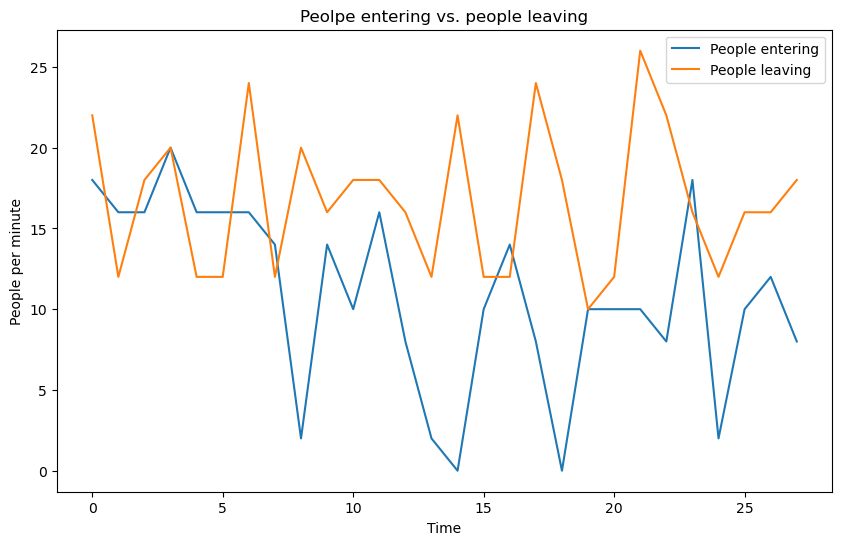

In [16]:
# Plot all values
plt.figure(figsize=(10, 6))

entering = [get_entering(tf) for tf in flow_rates]
leaving = [get_leaving(tf) for tf in flow_rates]
plt.plot(entering, label="People entering")
plt.plot(leaving, label="People leaving")

plt.title("Peolpe entering vs. people leaving")
plt.xlabel("Time")
plt.ylabel("People per minute")
plt.legend()

plt.show()

Combine both into one graph

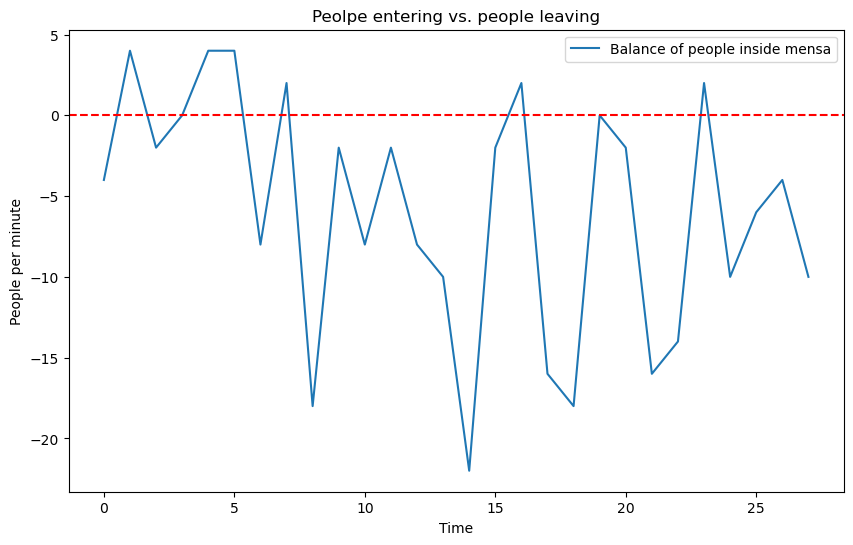

In [19]:
# Plot all values
plt.figure(figsize=(10, 6))

balance = [get_entering(tf) - get_leaving(tf) for tf in flow_rates]
plt.plot(balance, label="Balance of people inside mensa")

plt.axhline(0, color='red', linestyle='--')

plt.title("Peolpe entering vs. people leaving")
plt.xlabel("Time")
plt.ylabel("People per minute")
plt.legend()

plt.show()

Idea: also find out when it gets crowded at other spots like
entering - (all spots except auswahl) > 0  ---> (people probably queue there) etc.

Idea: find maximum flow rate per spot, and look how often it is reached in % 
---> Auswahl ist zu x % ausgelastet